In [2]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
from itertools import product
import seaborn as sns
sns.set()

%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
btes = [[[[] for i in range(5)] for j in range(10)] for ii in range(1)]
cv = 10


#code for life long dnn
forward_accuracy, reverse_accuracy = pickle.load(open('./type_detection.p','rb'))
err = reverse_accuracy.copy()
err_ = forward_accuracy.copy()
#print(err)
for cv_ in range(cv):
    err_b = err.iloc[np.where(err['shift']==cv_)]
    err_f = 1-np.asarray(err_.iloc[np.where(err_['shift']==cv_)]['forward_accuracy']) + 1e-10
    #print(err_b)
    for j in range(5):
        err_t = 1-np.asarray(err_b.iloc[np.where(err_b['task']==j)]['reverse_accuracy']) + 1e-10
        #print(err_t)
        for jj in range(5-j):
            if jj==0:
                btes[0][cv_][j].append(1)
            else:
                #print('hi')
                #print(err_f[j],err_t[jj-1])
                btes[0][cv_][j].append(err_f[j]/err_t[jj-1])
        #print(err_t)
        #for jj in range(10-j):
            
        
    #print(err_b)
print(btes[0])

[[[1, 1.0996714128807576, 1.1606936415441875, 1.2096385541158368, 1.2395061727212315], [1, 1.0115740740719308, 1.0050597976071647, 1.0055223193731206], [1, 1.0738916255793638, 1.0832298136232394], [1, 0.996484178805327], [1]], [[1, 1.1106094807627043, 1.202933985230839, 1.2346298618646774, 1.2599231752830096], [1, 1.019811320750979, 1.0280551592909073, 1.034944949730025], [1, 1.0230862697336156, 1.0591194968256004], [1, 1.0198574338045097], [1]], [[1, 1.0555555555322618, 1.1213808462711, 1.153493699815123, 1.1861012955542514], [1, 1.026327944567884, 1.0315691736245927, 1.0471253534312677], [1, 1.06157635464947, 1.085642317337208], [1, 1.0081424936370194], [1]], [[1, 1.0700431034180848, 1.1586931154451836, 1.2229064038310806, 1.2698209717289917], [1, 1.0206138341693791, 1.031959240383148, 1.0430711610406231], [1, 1.0433212996181367, 1.0420673076720832], [1, 1.007425742572787], [1]], [[1, 1.1004514672232724, 1.1818181817300273, 1.2436224488552952, 1.2499999998717952], [1, 1.0061864781252

In [4]:
mean_bte = [[[] for i in range(5)] for j in range(1)]


for alg in range(1):
    for j in range(5):
        tmp = 0
        for i in range(10):
            tmp += np.array(btes[alg][i][j])
        
        tmp=tmp/10
        mean_bte[0][j].append(tmp)

print(mean_bte)

[[[array([1.        , 1.09018947, 1.17347455, 1.21753568, 1.24210403])], [array([1.        , 1.01556817, 1.02491835, 1.03788014])], [array([1.        , 1.03570374, 1.06264253])], [array([1.        , 1.00804118])], [array([1.])]]]


In [5]:
fte_avg = np.zeros((1,5),dtype=float)
fte = [[[] for i in range(10)] for j in range(1)]

In [6]:
#life long dnn cifar results
forward_accuracy, _ = pickle.load(open('./type_detection.p','rb'))

err = forward_accuracy.copy()
err_1 = np.zeros(5,dtype=float)

for i in range(5):
    for cv_ in range(cv):
        tmp = np.asarray(err.iloc[np.where(err['shift']==cv_)]['org_accuracy']) + 1e-10
        err_1[i] += 1 - tmp[i]
        #print(tmp['org_accuracy'][cv_*10+i],err_1[i],i)

err_1 /= 10
print(err_1)

for cv_ in range(cv):
    err_f = 1-np.asarray(err.iloc[np.where(err['shift']==cv_)]['forward_accuracy']) + 1e-10
    #print(err_f)
    for task in range(5):
        #print(err_1[task],err_f[task])
        fte[0][cv_].append(err_1[task]/err_f[task])
        fte_avg[0][task] += err_1[task]/err_f[task]

fte_avg[0] /= 10
print(fte_avg[0])
#print(err.iloc[np.where(forward_accuracy_cifar['shift']==0)])

[0.2463   0.571375 0.2449   0.545425 0.4501  ]
[1.00013419 1.02096039 1.1412357  1.07722779 1.12597564]


In [7]:
#calculate TE
cv = 10
tasks = 10
tes = [[[[] for i in range(5)] for j in range(10)] for ii in range(1)]

In [8]:
#code for LL DNN

err = forward_accuracy.copy()
err_1 = np.zeros(5,dtype=float)

for i in range(5):
    for cv_ in range(cv):
        tmp = np.asarray(err.iloc[np.where(err['shift']==cv_)]['org_accuracy']) + 1e-10
        err_1[i] += 1 - tmp[i]
        #print(tmp['org_accuracy'][cv_*10+i],err_1[i],i)

err_1 /= 10


err = reverse_accuracy.copy()
err_ = forward_accuracy.copy()
#print(err)
for cv_ in range(cv):
    err_b = err.iloc[np.where(err['shift']==cv_)]
    err_f = 1-np.asarray(err_.iloc[np.where(err_['shift']==cv_)]['forward_accuracy']) + 1e-10
    #print(err_f)
    for j in range(5):
        err_t = 1-np.asarray(err_b.iloc[np.where(err_b['task']==j)]['reverse_accuracy']) + 1e-10
        for jj in range(5-j):
            if jj==0:
                #print(err_1[j],j,err_f[j])
                tes[0][cv_][j].append(err_1[j]/err_f[j])
            else:
                #print(err_1[j],j,err_t[jj-1])
                tes[0][cv_][j].append(err_1[j]/err_t[jj-1])

In [9]:
tes

[[[[0.9812748996090538,
    1.0790799552775117,
    1.1389595365831398,
    1.1869879507532588,
    1.2162962952018288],
   [1.0459954229664081,
    1.0581018514707217,
    1.0512879481046389,
    1.0517717437548508],
   [1.1233944944388101, 1.2064039397998014, 1.2168944088363258],
   [1.099647176996039, 1.0957810141444941],
   [1.1011620789966576]],
  [[1.001219511381618,
    1.1119638816650275,
    1.2044009769171633,
    1.2361355070333069,
    1.2614596659352317],
   [1.0571230338469708,
    1.078066037343761,
    1.0867807889516348,
    1.0940641451232045],
   [1.163420426525691, 1.1902794643060612, 1.2322012567385154],
   [1.089216175319178, 1.1108452134193798],
   [1.1445645258373642]],
  [[0.9783515384395822,
    1.0327044016634361,
    1.097104676126011,
    1.1285223357944911,
    1.1604240272506834],
   [1.028577857420598,
    1.0556581982345203,
    1.0610492103879203,
    1.0770499524831196],
   [1.1364269131617508, 1.2064039397998014, 1.2337531474892933],
   [1.1013124680

In [10]:
mean_eta = [[[] for i in range(5)] for j in range(1)]


for alg in range(1):
    for j in range(5):
        tmp = 0
        for i in range(10):
            tmp += np.array(tes[alg][i][j])
        
        tmp=tmp/10
        mean_eta[alg][j].append(tmp)

In [11]:
eta= [mean_eta[0]]

print(eta)

[[[array([1.00013419, 1.09042064, 1.17381819, 1.21791292, 1.24238016])], [array([1.02096039, 1.03686542, 1.04631553, 1.05947943])], [array([1.1412357 , 1.18170049, 1.21240536])], [array([1.07722779, 1.085857  ])], [array([1.12597564])]]]


In [12]:
te = {'LL-DNN':np.zeros(5,dtype=float)}
#eta[count][i][0][5]
for count,name in enumerate(te.keys()):
    for i in range(5):
        print(eta[count][i][0][4-i])
        te[name][i] = eta[count][i][0][4-i]
        
np.mean(te['LL-DNN'])

1.2423801570831305
1.059479425967311
1.2124053637191845
1.0858569973822036
1.1259756425889054


1.145219517348147

In [13]:
import pandas as pd
df = pd.DataFrame.from_dict(te)
df_ = pd.melt(df,var_name='Algorithms', value_name='Transfer Efficieny')
#ax = sns.stripplot(x="day", y="total_bill", data=tips)
print(df_)

  Algorithms  Transfer Efficieny
0     LL-DNN            1.242380
1     LL-DNN            1.059479
2     LL-DNN            1.212405
3     LL-DNN            1.085857
4     LL-DNN            1.125976


In [14]:
mean_te = { 'LL-DNN':[1.07]}
mean_df = pd.DataFrame.from_dict(mean_te)
mean_df = pd.melt(mean_df,var_name='Algorithms', value_name='Transfer Efficieny')
print(mean_df)

  Algorithms  Transfer Efficieny
0     LL-DNN                1.07


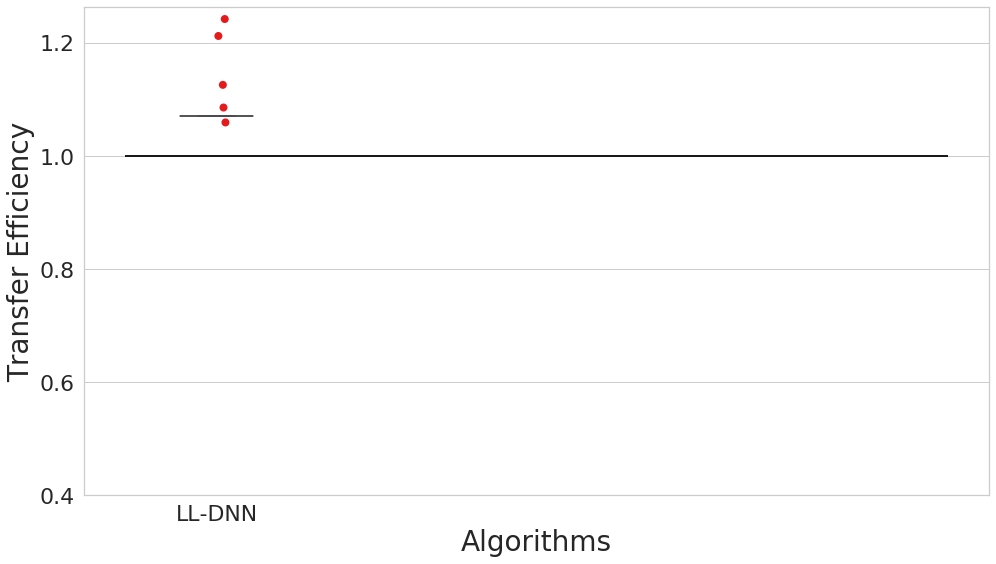

In [15]:
import seaborn as sns
sns.set(style="whitegrid")
clr = ["#e41a1c", "#173F5F","#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#000000"]
c = sns.color_palette(clr, n_colors=len(clr))

fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=8, ax=ax)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, ax=ax)
ax.hlines(1, -1,8, colors='k', linestyles='solid',linewidth=2)
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=28)
ax_.set_ylabel('Transfer Efficiency', fontsize=28)
plt.savefig('TE.png', dpi=500)

In [16]:
names = ['Lifelong Forest']
all_ftes = [fte_avg[0]]
mean_rte = [mean_bte[0]]
mean_eta_ = [mean_eta[0]]

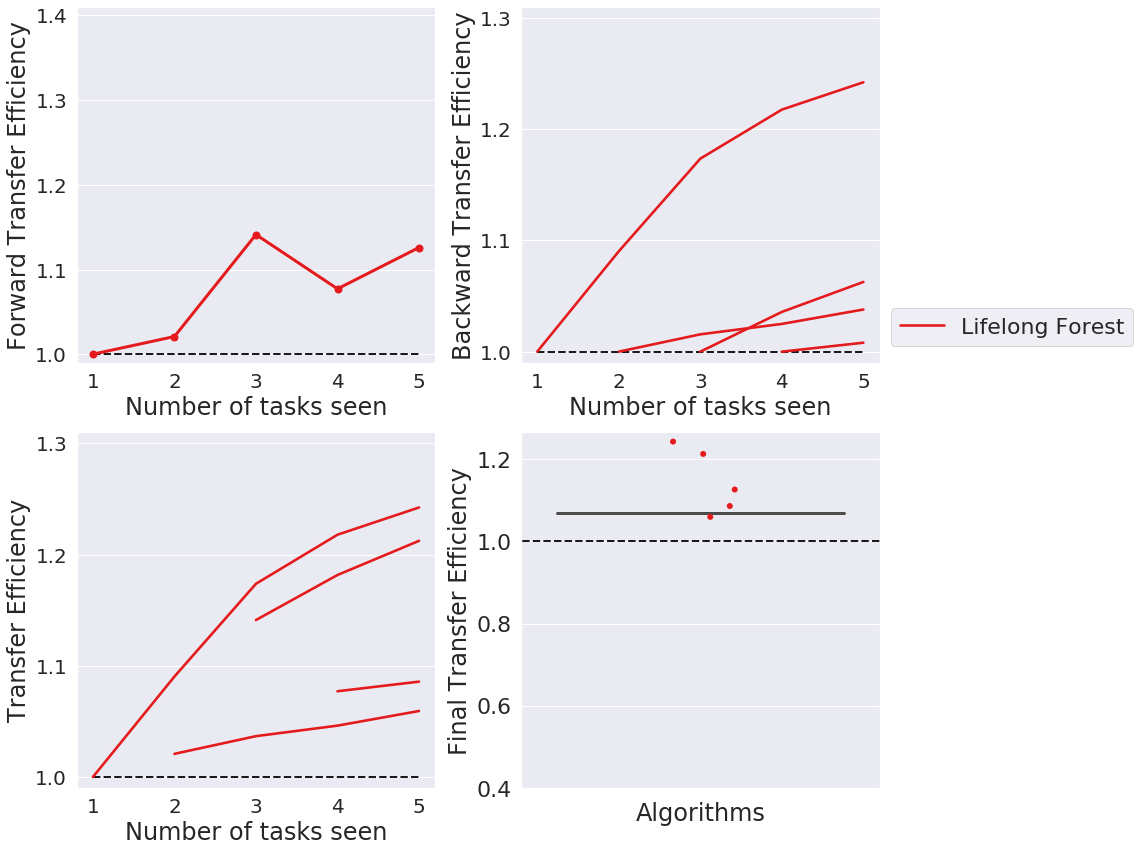

In [17]:
sns.set()
algos = names
fte = all_ftes
eta = mean_rte


clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=24
ticksize=20

fig, ax = plt.subplots(2,2, figsize=(16,12))
# plt.subplots_adjust(right=0.5)
items = []
for i, fte in enumerate(all_ftes):
    if i == 0:
        ax[0][0].plot(np.arange(1,6), fte, c=clr[i], marker='.', markersize=14, label=algos[i], linewidth=3)
        continue
        
    if i == 1:
        ax[0][0].plot(np.arange(1,6), fte, c=clr[i], marker='.', linestyle='dashed', markersize=12, label=algos[i])
        continue

    item = ax[0][0].plot(np.arange(1,6), fte, c=clr[i], marker='.', markersize=12, label=algos[i])
    items.append(item)
    
ax[0][0].set_xticks(np.arange(1,6))
ax[0][0].set_yticks([1.0, 1.1, 1.2, 1.3, 1.4])
ax[0][0].set_ylim(0.99, 1.41)
ax[0][0].tick_params(labelsize=ticksize)
# ax[0].legend(algos, loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax[0][0].set_ylabel('Forward Transfer Efficiency', fontsize=fontsize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)

ax[0][0].grid(axis='x')

n_tasks=5
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(eta[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax[0][1].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[0][1].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax[0][1].legend(loc='center left', bbox_to_anchor=(1, 0.1), fontsize=22)
ax[0][1].set_yticks([1, 1.1,1.2,1.3])
ax[0][1].set_xticks(np.arange(1,6))
ax[0][1].set_ylim(0.99, 1.31)
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].grid(axis='x')


n_tasks=5
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_eta_[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0 or i==1:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
                
        elif j == 1:
            if i == 0 or i==1:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0 or i==1:
                ax[1][0].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[1][0].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
#ax[1][0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax[1][0].set_yticks([1, 1.1, 1.2, 1.3])
ax[1][0].set_xticks(np.arange(1,6))
ax[1][0].set_ylim(0.99, 1.31)
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].grid(axis='x')

ax[0][0].hlines(1, 1,5, colors='k', linestyles='dashed',linewidth=2)
ax[0][1].hlines(1, 1,5, colors='k', linestyles='dashed',linewidth=2)
ax[1][0].hlines(1, 1,5, colors='k', linestyles='dashed',linewidth=2)



ax[1][1].tick_params(labelsize=22)
ax_ = sns.stripplot(x="Algorithms", y="Transfer Efficieny", data=df_, palette=c, size=6, ax=ax[1][1])
ax[1][1].hlines(1, -1,8, colors='k', linestyles='dashed',linewidth=2)
sns.boxplot(x="Algorithms", y="Transfer Efficieny", data=mean_df, palette=c, linewidth=3, ax=ax[1][1])
ax_.set_yticks([.4,.6,.8,1, 1.2])
ax_.set_xlabel('Algorithms', fontsize=fontsize)
ax_.set_ylabel('Final Transfer Efficiency', fontsize=fontsize)
ax_.set_xticklabels([])

plt.tight_layout()
# lgd = fig.legend(algos, bbox_to_anchor=(1, 0.45), loc='center left', fontsize=18)
plt.savefig('fte_bte_wide.pdf', dpi=500)

In [18]:
res = unpickle('./rotation_res/EWC_10.pickle')
print(res)

[0.68075 0.6921 ]


In [19]:
###new plot
btes = [[[[] for i in range(5)] for j in range(10)] for ii in range(1)]
cv = 10


#code for life long dnn
forward_accuracy, reverse_accuracy = pickle.load(open('./type_detection.p','rb'))
err = reverse_accuracy.copy()
err_ = forward_accuracy.copy()
#print(err)
for cv_ in range(cv):
    err_b = err.iloc[np.where(err['shift']==cv_)]
    err_f = 1-np.asarray(err_.iloc[np.where(err_['shift']==cv_)]['forward_accuracy']) + 1e-10
    #print(err_b)
    for j in range(5):
        err_t = 1-np.asarray(err_b.iloc[np.where(err_b['task']==j)]['reverse_accuracy']) + 1e-10
        #print(err_t)
        for jj in range(5-j):
            if jj==0:
                btes[0][cv_][j].append(1)
            else:
                #print('hi')
                #print(err_f[j],err_t[jj-1])
                btes[0][cv_][j].append(err_f[j]/err_t[jj-1])
        #print(err_t)
        #for jj in range(10-j):
            
        
mean_bte = [[[] for i in range(5)] for j in range(1)]


for alg in range(1):
    for j in range(5):
        tmp = 0
        for i in range(10):
            tmp += np.array(btes[alg][i][j])
        
        tmp=tmp/10
        mean_bte[0][j].append(tmp)

print(mean_bte)

[[[array([1.        , 1.09018947, 1.17347455, 1.21753568, 1.24210403])], [array([1.        , 1.01556817, 1.02491835, 1.03788014])], [array([1.        , 1.03570374, 1.06264253])], [array([1.        , 1.00804118])], [array([1.])]]]


In [20]:
btes_ = [[[[] for i in range(10)] for j in range(10)] for ii in range(1)]
cv = 10


#code for life long dnn
forward_accuracy, reverse_accuracy = pickle.load(open('./language_detection.p','rb'))
err = reverse_accuracy.copy()
err_ = forward_accuracy.copy()
#print(err)
for cv_ in range(0,cv):
    err_b = err.iloc[np.where(err['shift']==cv_)]
    err_f = 1-np.asarray(err_.iloc[np.where(err_['shift']==cv_)]['forward_accuracy']) + 1e-10
    #print(err)
    for j in range(10):
        err_t = 1-np.asarray(err_b.iloc[np.where(err_b['task']==j)]['reverse_accuracy']) + 1e-10
        #print(err_t)
        for jj in range(10-j):
            if jj==0:
                btes_[0][cv_][j].append(1)
            else:
                #print(err_f[j],err_t[jj-1])
                btes_[0][cv_][j].append(err_f[j]/err_t[jj-1])
        #print(err_t)
        #for jj in range(10-j):
            
        
    #print(err_b)
mean_bte_ = [[[] for i in range(10)] for j in range(1)]


for alg in range(1):
    for j in range(10):
        tmp = 0
        for i in range(10):
            tmp += np.array(btes_[alg][i][j])
        
        tmp=tmp/10
        mean_bte_[0][j].append(tmp)

print(mean_bte_)

[[[array([1.        , 1.01398082, 1.02532814, 1.02656047, 1.03615945,
       1.03777206, 1.04299724, 1.03893359, 1.04075897, 1.04312727])], [array([1.        , 0.99645837, 0.99618497, 0.99795125, 1.00075671,
       0.99940047, 1.00218417, 1.00426048, 1.0044764 ])], [array([1.        , 1.12181817, 1.19583332, 1.30583332, 1.44181813,
       1.51797613, 1.43369042, 1.29999995])], [array([1.        , 1.15383376, 1.19202381, 1.25465336, 1.15205951,
       1.22158508, 1.34354978])], [array([1.        , 1.13084415, 1.1529365 , 1.32200757, 1.29780954,
       1.184662  ])], [array([1.        , 0.98460912, 0.9740328 , 0.98940636, 0.95728829])], [array([1.        , 0.99478791, 0.98375734, 0.98615595])], [array([1.        , 1.02391617, 1.04132682])], [array([1.        , 0.90000001])], [array([1.])]]]


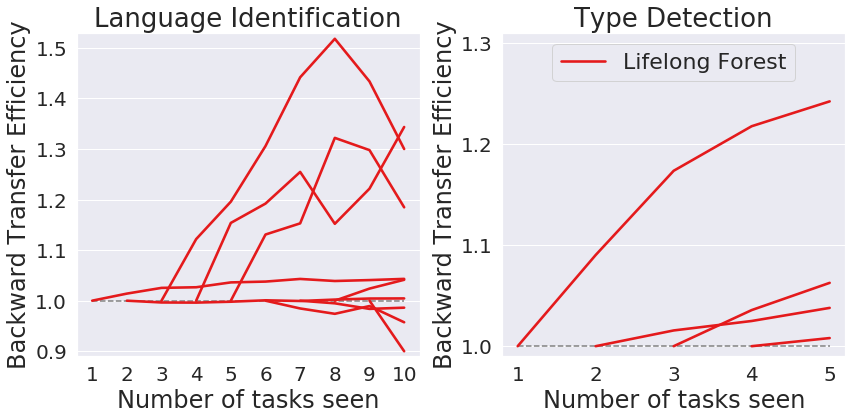

In [22]:
clr = ["#e41a1c"]
algos = names
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=24
ticksize=20

fig, ax = plt.subplots(1,2, figsize=(12,6))

n_tasks=5
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_bte[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[1].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[1].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax[1].plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax[1].plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax[1].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[1].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1].set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax[1].legend(fontsize=22,loc='upper center')
ax[1].set_yticks([1, 1.1,1.2,1.3])
ax[1].set_xticks(np.arange(1,6))
ax[1].set_ylim(0.99, 1.31)
ax[1].tick_params(labelsize=ticksize)
ax[1].grid(axis='x')
ax[1].set_title('Type Detection',fontsize=fontsize+2)

n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_bte_[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax[0].plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax[0].plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax[0].plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax[0].plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax[0].plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax[0].plot(ns, et[j,:], c=c[j])


# ax[1].set_title(ttle, fontsize=20)
ax[0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0].set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
#ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.1), fontsize=22)
ax[0].set_yticks([.9,1, 1.1,1.2,1.3,1.4,1.5])
ax[0].set_xticks(np.arange(1,11))
ax[0].set_ylim(0.89, 1.53)
ax[0].tick_params(labelsize=ticksize)
ax[0].grid(axis='x')
ax[0].set_title('Language Identification',fontsize=fontsize+2)


ax[1].hlines(1, 1,5, colors='grey', linestyles='dashed',linewidth=1.5)
ax[0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)

plt.savefig('NLP.pdf', dpi=500)

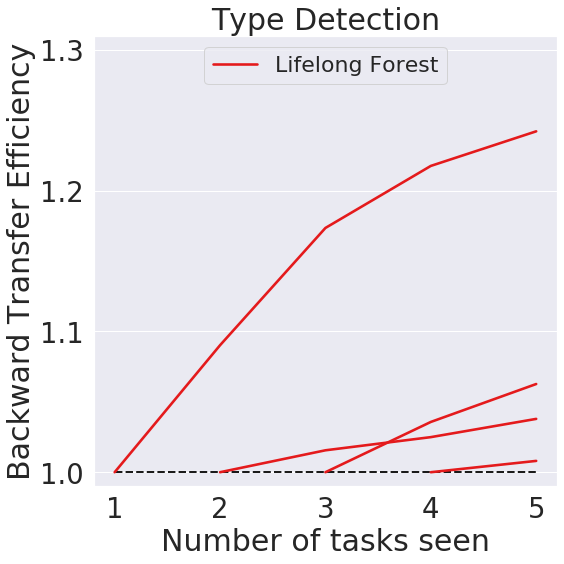

In [115]:
clr = ["#e41a1c"]
algos = names
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=30
labelsize=27.5

fig, ax = plt.subplots(1,1, figsize=(8,8))

n_tasks=5
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_bte[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax.plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax.plot(ns, et[j,:], c=c[j])


ax.hlines(1, 1,5, colors='k', linestyles='dashed',linewidth=2)
ax.set_xlabel('Number of tasks seen', fontsize=fontsize)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax.legend(fontsize=22,loc='upper center')
ax.set_yticks([1, 1.1,1.2,1.3])
ax.set_xticks(np.arange(1,6))
ax.set_ylim(0.99, 1.31)
ax.tick_params(labelsize=labelsize)
ax.grid(axis='x')
ax.set_title('Type Detection',fontsize=fontsize)

plt.savefig('NLP_type.pdf', dpi=500)

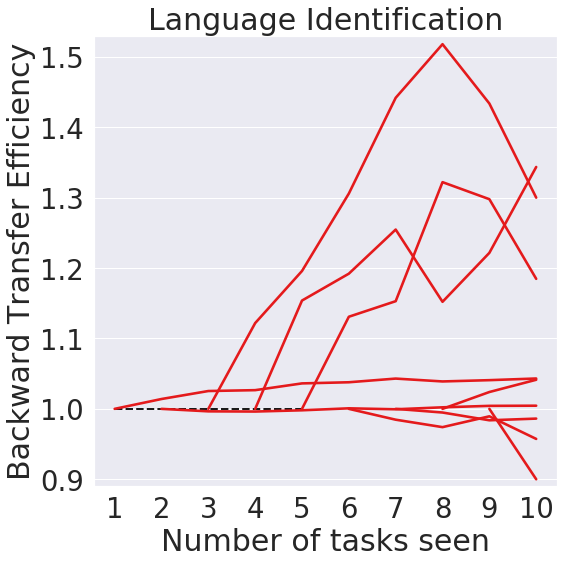

In [116]:
clr = ["#e41a1c"]
algos = names
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=30
labelsize=27.5

fig, ax = plt.subplots(1,1, figsize=(8,8))

n_tasks=10
n_alg=len(algos)
c = sns.color_palette(clr, n_colors=len(algos))
for i in range(n_tasks - 1):

    et = np.zeros((n_alg,n_tasks-i))

    for j in range(0,n_alg):
        et[j,:] = np.asarray(mean_bte_[j][i])

    ns = np.arange(i + 1, n_tasks + 1)
    for j in range(0,n_alg):
        if j == 0:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linewidth = 2.6)
            else:
                ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
        elif j==1:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j], linestyle='dashed')
            else:
                ax.plot(ns, et[j,:], c=c[j], linestyle='dashed')
        else:
            if i == 0:
                ax.plot(ns, et[j,:], label = algos[j], c=c[j])
            else:
                ax.plot(ns, et[j,:], c=c[j])


ax.hlines(1, 1,5, colors='k', linestyles='dashed',linewidth=2)
ax.set_xlabel('Number of tasks seen', fontsize=fontsize)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
# ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax[1].legend(loc='upper left', fontsize=12)
ax.set_yticks([.9,1, 1.1,1.2,1.3,1.4,1.5])
ax.set_xticks(np.arange(1,11))
ax.set_ylim(0.89, 1.53)
ax.tick_params(labelsize=labelsize)
ax.grid(axis='x')
ax.set_title('Language Identification',fontsize=fontsize)

plt.savefig('NLP_language.pdf', dpi=500)